In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data = pd.read_csv('UNSW_NB15_training-set.csv')

In [47]:
print(data.head())
print(data.info())
print(data.describe())

   id       dur proto service state  spkts  dpkts  sbytes  dbytes       rate  \
0   1  0.121478   tcp       -   FIN      6      4     258     172  74.087490   
1   2  0.649902   tcp       -   FIN     14     38     734   42014  78.473372   
2   3  1.623129   tcp       -   FIN      8     16     364   13186  14.170161   
3   4  1.681642   tcp     ftp   FIN     12     12     628     770  13.677108   
4   5  0.449454   tcp       -   FIN     10      6     534     268  33.373826   

   ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  \
0  ...                 1               1             0           0   
1  ...                 1               2             0           0   
2  ...                 1               3             0           0   
3  ...                 1               3             1           1   
4  ...                 1              40             0           0   

   ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  attack_cat  \
0                 0   

In [48]:
data.dropna(inplace=True) 

In [49]:
X = data.drop(columns=['attack_cat', 'label'])  # Drop non-feature columns
y = data['label']  # Assuming 'label' is your target column

In [50]:
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(exclude=['object']).columns.tolist()

# Step 6: Create a Column Transformer for Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Scale numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)   # One-hot encode categorical features, ignoring unknown categories
    ]
)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Create a Pipeline for Preprocessing and Model Training
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])


In [54]:
pipeline.fit(X_train, y_train)

# Step 10: Predictions
y_pred = pipeline.predict(X_test)

In [55]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10727   442]
 [   93 23807]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.98     11169
           1       0.98      1.00      0.99     23900

    accuracy                           0.98     35069
   macro avg       0.99      0.98      0.98     35069
weighted avg       0.98      0.98      0.98     35069



Confusion Matrix:
[[10727   442]
 [   93 23807]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98     11169
           1       0.98      1.00      0.99     23900

    accuracy                           0.98     35069
   macro avg       0.99      0.98      0.98     35069
weighted avg       0.98      0.98      0.98     35069



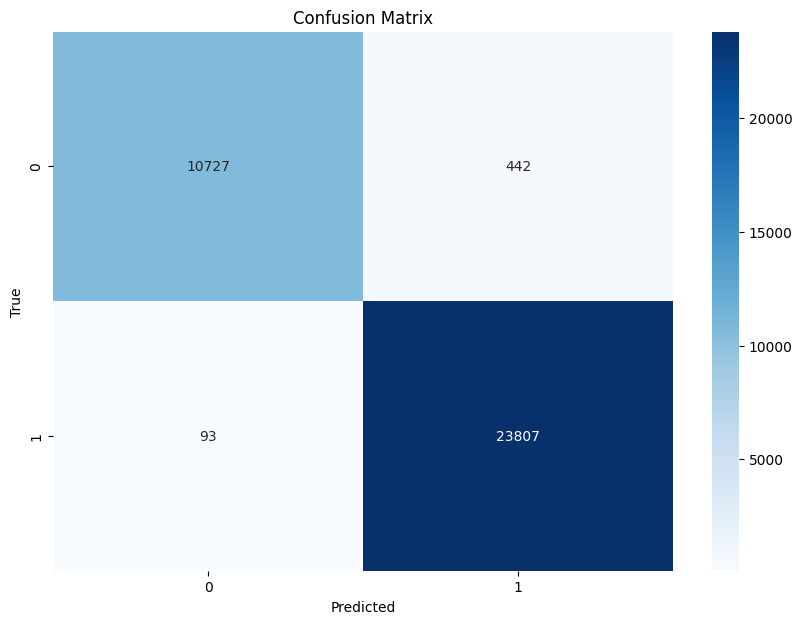

In [56]:
# Assuming you have already trained your model with the previous pipeline
# Now let's test the model using the test dataset

# Step 1: Make Predictions
y_pred = pipeline.predict(X_test)

# Step 2: Evaluate the Model
from sklearn.metrics import classification_report, confusion_matrix

# Step 3: Generate Evaluation Metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 4: Visualize Results (Optional)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [58]:
import joblib

# Save the trained pipeline to a Joblib file
joblib_file = "trained_pipeline.joblib"  # Specify the filename
joblib.dump(pipeline, joblib_file)

print(f"Model saved to {joblib_file}")


Model saved to trained_pipeline.joblib


In [59]:
# Load the pipeline from the Joblib file
loaded_pipeline = joblib.load(joblib_file)

# Now you can use the loaded model to make predictions
y_pred_loaded = loaded_pipeline.predict(X_test)

# Example of checking the predictions
print("Predictions from the loaded model:", y_pred_loaded)


Predictions from the loaded model: [0 1 1 ... 0 0 1]


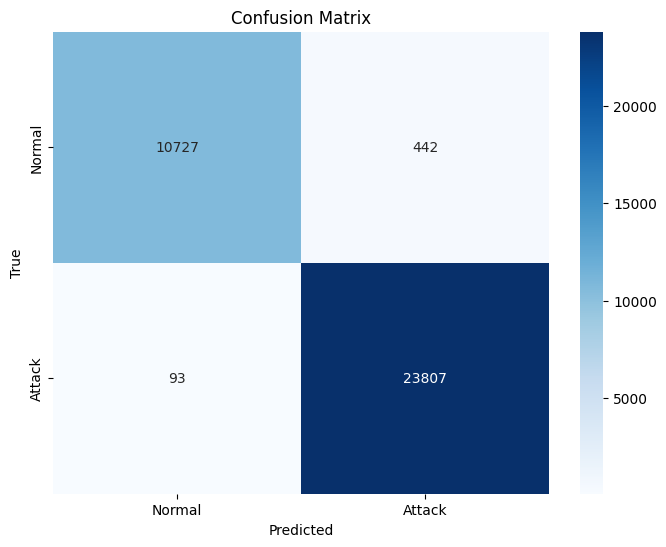

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have y_test and y_pred from your predictions
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


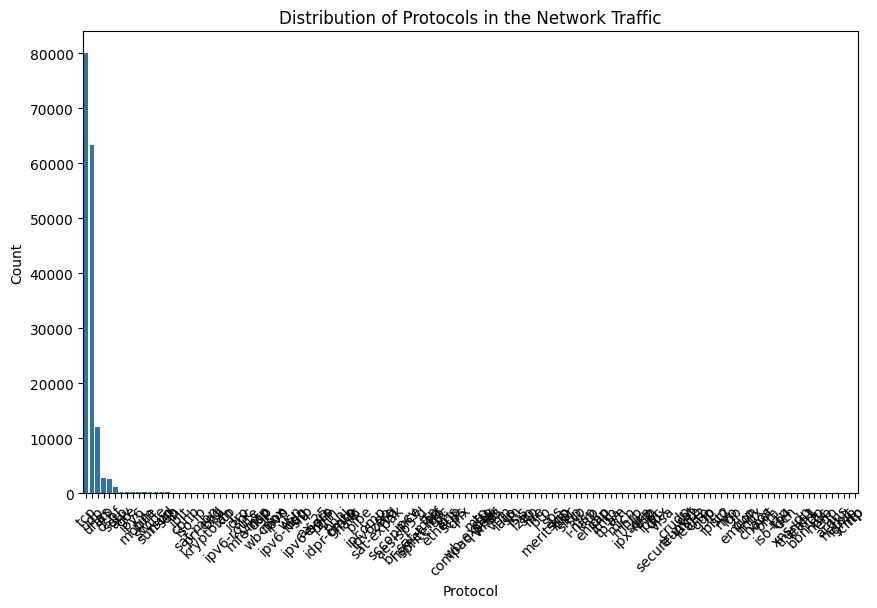

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'proto' column contains the protocol type (e.g., TCP, UDP, ICMP)
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='proto', order=data['proto'].value_counts().index)
plt.title('Distribution of Protocols in the Network Traffic')
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


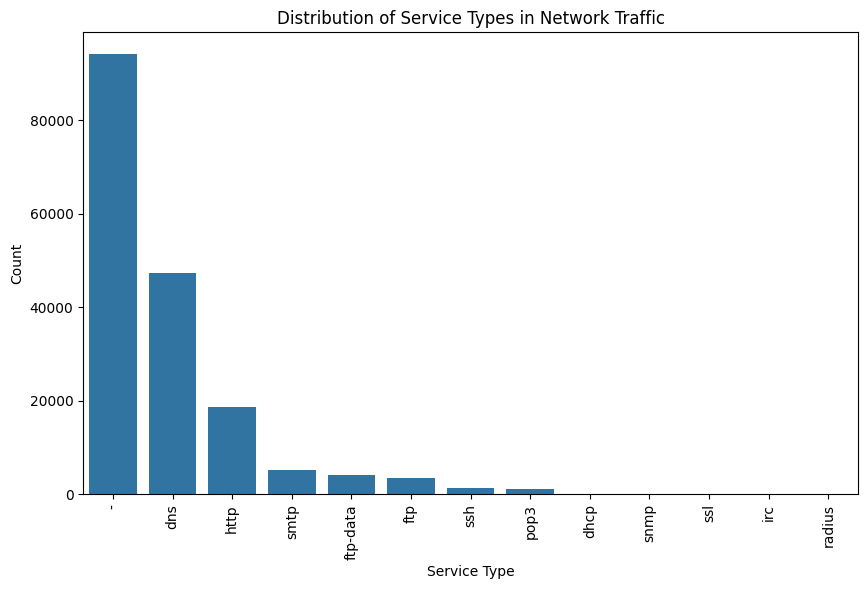

In [65]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='service', order=data['service'].value_counts().index)
plt.title('Distribution of Service Types in Network Traffic')
plt.xlabel('Service Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


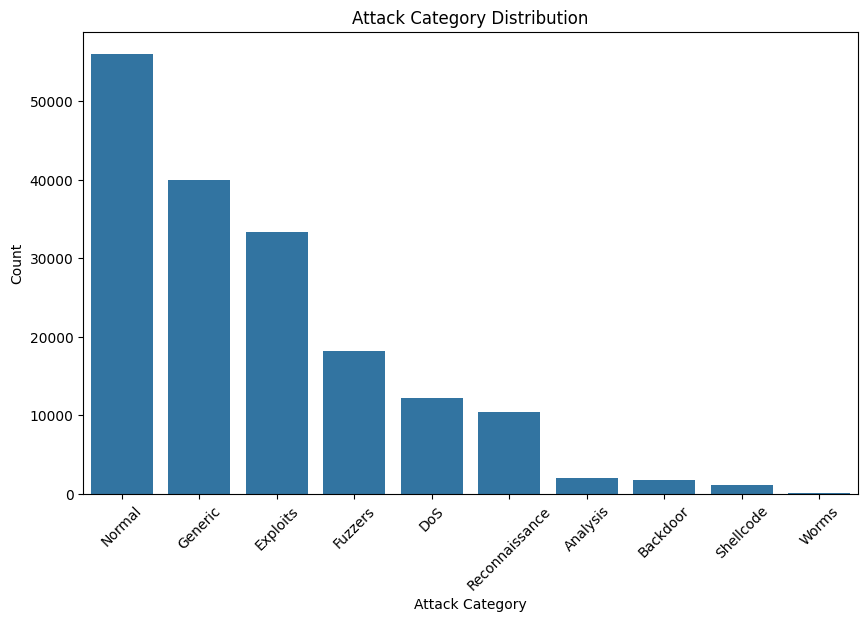

In [66]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='attack_cat', order=data['attack_cat'].value_counts().index)
plt.title('Attack Category Distribution')
plt.xlabel('Attack Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


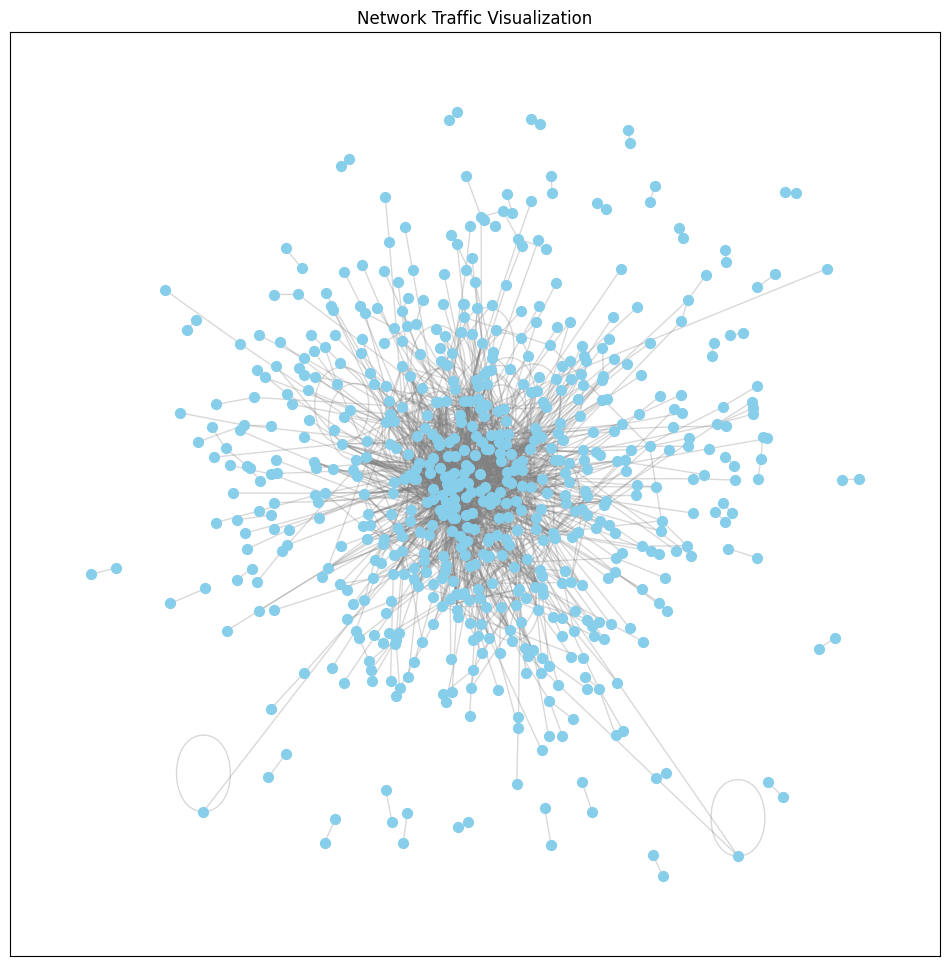

In [72]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Iterate through the dataset to create edges between 'spkts' (source packets) and 'dpkts' (destination packets)
for i, row in data.iterrows():
    # Add an edge between source and destination packets with a weight based on duration ('dur')
    G.add_edge(row['spkts'], row['dpkts'], weight=row['dur'])

# Draw the network graph
plt.figure(figsize=(12, 12))

# Positioning the nodes
pos = nx.spring_layout(G, k=0.15, iterations=20)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=50, node_color='skyblue')

# Draw edges
nx.draw_networkx_edges(G, pos, alpha=0.3, edge_color='gray')

# Display the network graph
plt.title('Network Traffic Visualization')
plt.show()


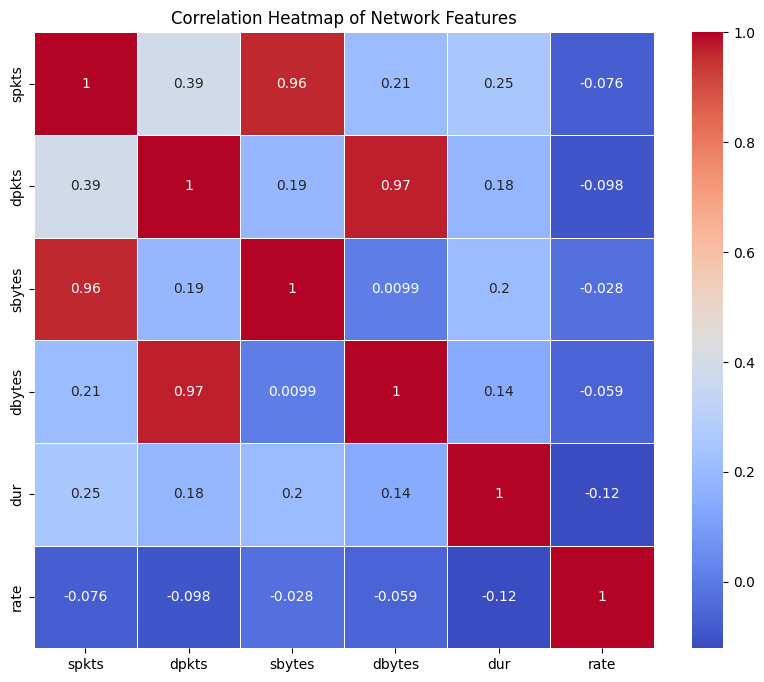

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant numerical columns for correlation
corr_columns = ['spkts', 'dpkts', 'sbytes', 'dbytes', 'dur', 'rate']

# Calculate correlation matrix
corr_matrix = data[corr_columns].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Network Features')
plt.show()


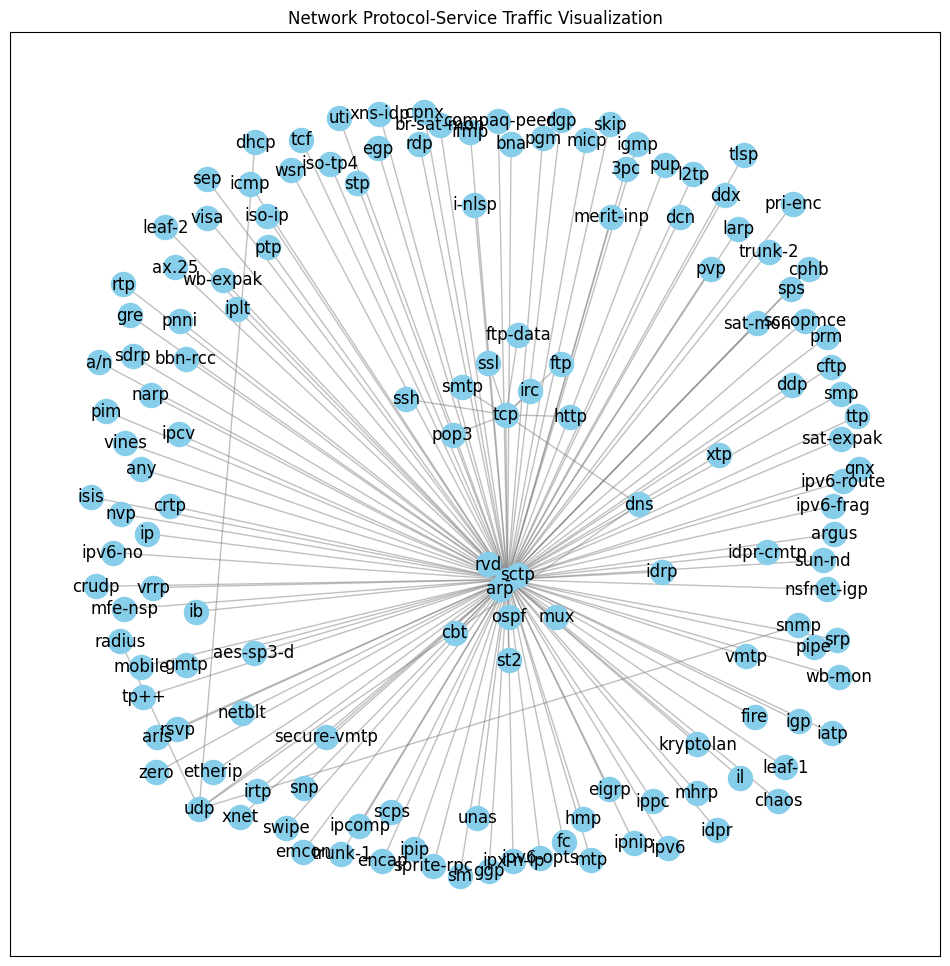

In [74]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Iterate through the dataset to create edges based on protocol ('proto') and service ('service')
for i, row in data.iterrows():
    # Add an edge between protocol and service, weighted by duration ('dur')
    G.add_edge(row['proto'], row['service'], weight=row['dur'])

# Draw the network graph
plt.figure(figsize=(12, 12))

# Positioning the nodes
pos = nx.spring_layout(G, k=0.15, iterations=20)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=300, node_color='skyblue')

# Draw edges
nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color='gray')

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=12, font_color='black')

# Display the network graph
plt.title('Network Protocol-Service Traffic Visualization')
plt.show()


In [75]:
import pandas as pd
import numpy as np

# Creating a DataFrame with fake network traffic data
np.random.seed(42)

# Number of entries
num_rows = 1000

# Generate fake source and destination IPs
src_ips = [f'192.168.1.{i}' for i in np.random.randint(1, 255, num_rows)]
dst_ips = [f'10.0.0.{i}' for i in np.random.randint(1, 255, num_rows)]

# Generate fake protocols (TCP, UDP)
protocols = np.random.choice(['TCP', 'UDP'], num_rows)

# Generate fake service types (HTTP, DNS, FTP)
services = np.random.choice(['HTTP', 'DNS', 'FTP', 'SSH', 'SMTP'], num_rows)

# Generate fake packet counts (normal traffic vs. suspicious traffic)
spkts = np.random.randint(1, 1000, num_rows)
dpkts = np.random.randint(1, 1000, num_rows)

# Generate fake byte sizes (normal vs unusual large traffic)
sbytes = np.random.randint(500, 100000, num_rows)
dbytes = np.random.randint(500, 100000, num_rows)

# Random durations
dur = np.random.exponential(scale=1, size=num_rows)

# Simulate traffic rates and inject anomalies (very high rates)
rate = np.random.exponential(scale=100, size=num_rows)
rate[np.random.choice(num_rows, 10)] = np.random.uniform(10000, 20000, 10)  # Inject anomalies

# Suspicious: Multiple connections from the same source to different destinations (e.g., port scanning)
src_ips_suspicious = np.random.choice(src_ips, size=5)
for i in range(5):
    for j in range(5):
        src_ips = np.append(src_ips, src_ips_suspicious[i])
        dst_ips = np.append(dst_ips, f'10.0.0.{np.random.randint(1, 255)}')
        protocols = np.append(protocols, 'TCP')
        services = np.append(services, 'HTTP')
        spkts = np.append(spkts, np.random.randint(50, 100))  # Smaller packets
        dpkts = np.append(dpkts, np.random.randint(50, 100))
        sbytes = np.append(sbytes, np.random.randint(1000, 5000))  # Unusual small byte size
        dbytes = np.append(dbytes, np.random.randint(1000, 5000))
        dur = np.append(dur, np.random.uniform(0.01, 0.1))  # Short duration, typical of port scanning
        rate = np.append(rate, np.random.uniform(1000, 5000))  # High rate, indicative of scanning behavior

# Combine everything into a DataFrame
df_fake_network = pd.DataFrame({
    'src_ip': src_ips,
    'dst_ip': dst_ips,
    'proto': protocols,
    'service': services,
    'spkts': spkts,
    'dpkts': dpkts,
    'sbytes': sbytes,
    'dbytes': dbytes,
    'dur': dur,
    'rate': rate
})

# Label normal vs suspicious
df_fake_network['label'] = 'Normal'
df_fake_network.iloc[-25:, df_fake_network.columns.get_loc('label')] = 'Suspicious'

# Display some rows
print(df_fake_network.head(10))


          src_ip      dst_ip proto service  spkts  dpkts  sbytes  dbytes  \
0  192.168.1.103  10.0.0.157   TCP     DNS    553     74   90291   62192   
1  192.168.1.180  10.0.0.141   UDP     SSH    529    548   41503   82884   
2   192.168.1.93   10.0.0.46   TCP     FTP    856    613   20496   21355   
3   192.168.1.15   10.0.0.35   TCP     FTP    789    988   87098   84247   
4  192.168.1.107  10.0.0.253   UDP    SMTP    819    512   36431   60872   
5   192.168.1.72  10.0.0.134   TCP    SMTP    571    156   36210   25595   
6  192.168.1.189   10.0.0.82   TCP     FTP    935    938   35193   39224   
7   192.168.1.21  10.0.0.115   UDP    SMTP    183    255   36240   49741   
8  192.168.1.103  10.0.0.197   TCP     SSH     41    171   77741   52503   
9  192.168.1.122   10.0.0.47   UDP    HTTP    551    981   94083   68879   

        dur        rate   label  
0  4.309752   33.415666  Normal  
1  0.910905  525.429179  Normal  
2  0.085521  339.797015  Normal  
3  1.040826   58.113908  No

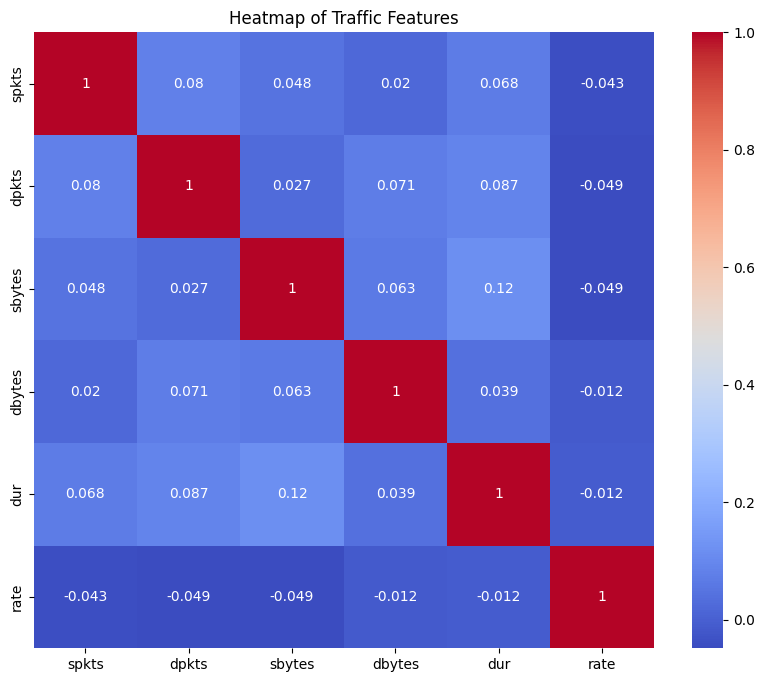

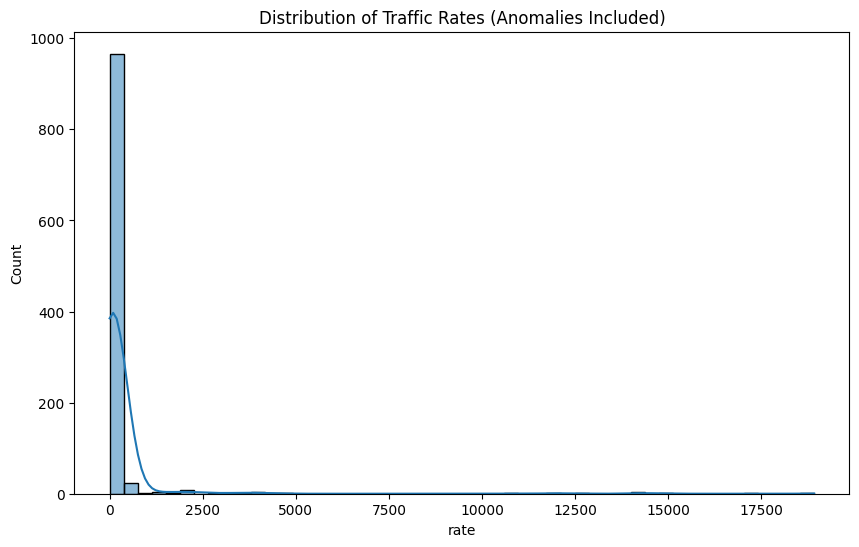

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap to identify relationships between features
plt.figure(figsize=(10, 8))
sns.heatmap(df_fake_network[['spkts', 'dpkts', 'sbytes', 'dbytes', 'dur', 'rate']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Traffic Features')
plt.show()

# Visualize distribution of rates, where anomalies might occur
plt.figure(figsize=(10, 6))
sns.histplot(df_fake_network['rate'], bins=50, kde=True)
plt.title('Distribution of Traffic Rates (Anomalies Included)')
plt.show()


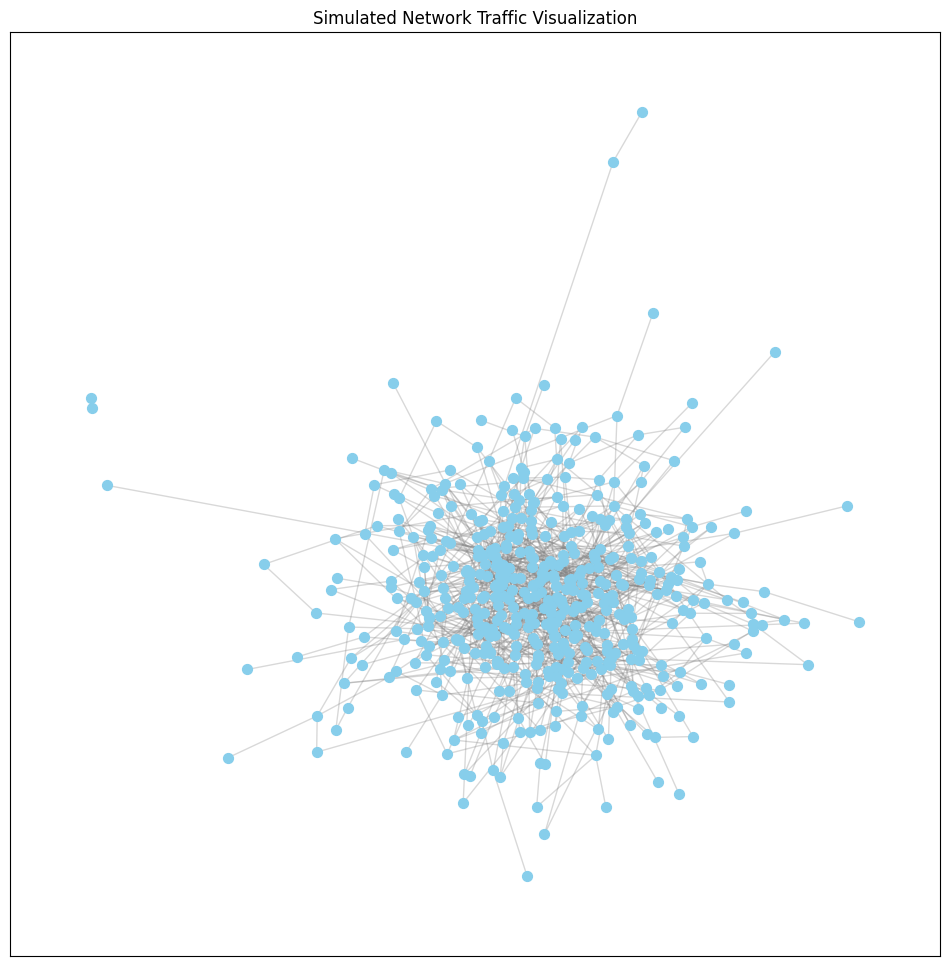

In [77]:
import networkx as nx

# Create the network graph
G = nx.Graph()

# Iterate through the DataFrame and add edges (connections between src_ip and dst_ip)
for i, row in df_fake_network.iterrows():
    G.add_edge(row['src_ip'], row['dst_ip'], weight=row['rate'])

# Draw the network graph
plt.figure(figsize=(12, 12))

# Positioning the nodes using spring layout
pos = nx.spring_layout(G, k=0.15, iterations=20)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=50, node_color='skyblue')

# Draw edges
nx.draw_networkx_edges(G, pos, alpha=0.3, edge_color='gray')

# Display the network graph
plt.title('Simulated Network Traffic Visualization')
plt.show()


In [78]:
# Detect unusual patterns based on traffic rates and port scanning behavior
# Mark rows with high traffic rates as "Suspicious"
df_fake_network['anomaly'] = 'Normal'  # Default label

# Mark high traffic rates as anomalies
df_fake_network.loc[df_fake_network['rate'] > 10000, 'anomaly'] = 'Suspicious - High Traffic Rate'

# Detect possible port scanning by checking repeated src_ip to multiple dst_ip
df_fake_network['src_dst_count'] = df_fake_network.groupby('src_ip')['dst_ip'].transform('nunique')
df_fake_network.loc[df_fake_network['src_dst_count'] > 5, 'anomaly'] = 'Suspicious - Port Scanning'

# Check final anomaly counts
print(df_fake_network[['src_ip', 'dst_ip', 'rate', 'src_dst_count', 'anomaly']].tail(10))


             src_ip      dst_ip         rate  src_dst_count  \
1015  192.168.1.113  10.0.0.249  3835.197060             13   
1016  192.168.1.113  10.0.0.205  1452.973807             13   
1017  192.168.1.113   10.0.0.28  3716.686798             13   
1018  192.168.1.113  10.0.0.188  1456.735121             13   
1019  192.168.1.113   10.0.0.64  2798.333412             13   
1020  192.168.1.254  10.0.0.105  2121.820259             12   
1021  192.168.1.254   10.0.0.51  4623.027163             12   
1022  192.168.1.254   10.0.0.14  2148.965392             12   
1023  192.168.1.254   10.0.0.85  2719.325030             12   
1024  192.168.1.254  10.0.0.104  3352.574827             12   

                         anomaly  
1015  Suspicious - Port Scanning  
1016  Suspicious - Port Scanning  
1017  Suspicious - Port Scanning  
1018  Suspicious - Port Scanning  
1019  Suspicious - Port Scanning  
1020  Suspicious - Port Scanning  
1021  Suspicious - Port Scanning  
1022  Suspicious - Port Sc

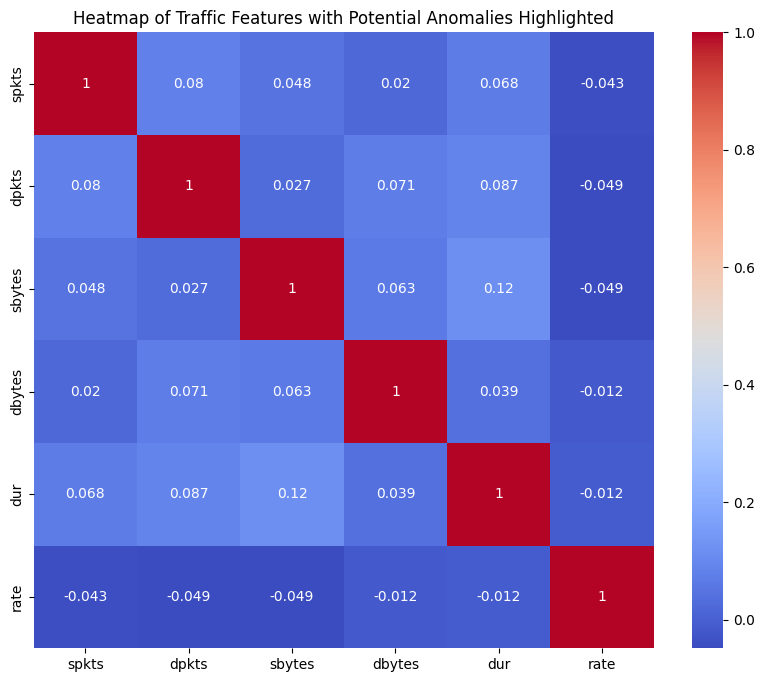

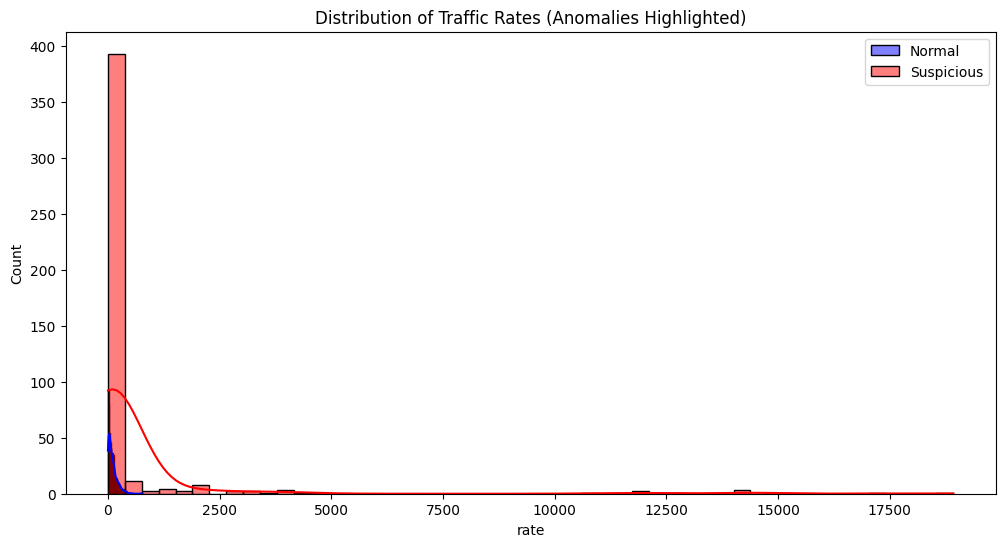

Anomalies Detected:
            src_ip      dst_ip        rate                     anomaly
2    192.168.1.93   10.0.0.46  339.797015  Suspicious - Port Scanning
3    192.168.1.15   10.0.0.35   58.113908  Suspicious - Port Scanning
6   192.168.1.189   10.0.0.82  125.744643  Suspicious - Port Scanning
7    192.168.1.21  10.0.0.115  116.136500  Suspicious - Port Scanning
11  192.168.1.215  10.0.0.194  118.372309  Suspicious - Port Scanning
15  192.168.1.117  10.0.0.242    8.057203  Suspicious - Port Scanning
17  192.168.1.104  10.0.0.109   42.052946  Suspicious - Port Scanning
18  192.168.1.152    10.0.0.5   39.834646  Suspicious - Port Scanning
19  192.168.1.131  10.0.0.119   92.194746  Suspicious - Port Scanning
21   192.168.1.53   10.0.0.33  150.010716  Suspicious - Port Scanning


In [80]:
import seaborn as sns

# Heatmap of traffic features, highlighting unusual patterns
plt.figure(figsize=(10, 8))
sns.heatmap(df_fake_network[['spkts', 'dpkts', 'sbytes', 'dbytes', 'dur', 'rate']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Traffic Features with Potential Anomalies Highlighted')
plt.show()

# Distribution of traffic rates, where unusual patterns are highlighted
plt.figure(figsize=(12, 6))
sns.histplot(df_fake_network[df_fake_network['anomaly'] == 'Normal']['rate'], bins=50, kde=True, color='blue', label='Normal')
sns.histplot(df_fake_network[df_fake_network['anomaly'] != 'Normal']['rate'], bins=50, kde=True, color='red', label='Suspicious', alpha=0.5)
plt.title('Distribution of Traffic Rates (Anomalies Highlighted)')
plt.legend()
plt.show()

# Print the rows where anomalies were detected
anomalies = df_fake_network[df_fake_network['anomaly'] != 'Normal']
print("Anomalies Detected:\n", anomalies[['src_ip', 'dst_ip', 'rate', 'anomaly']].head(10))


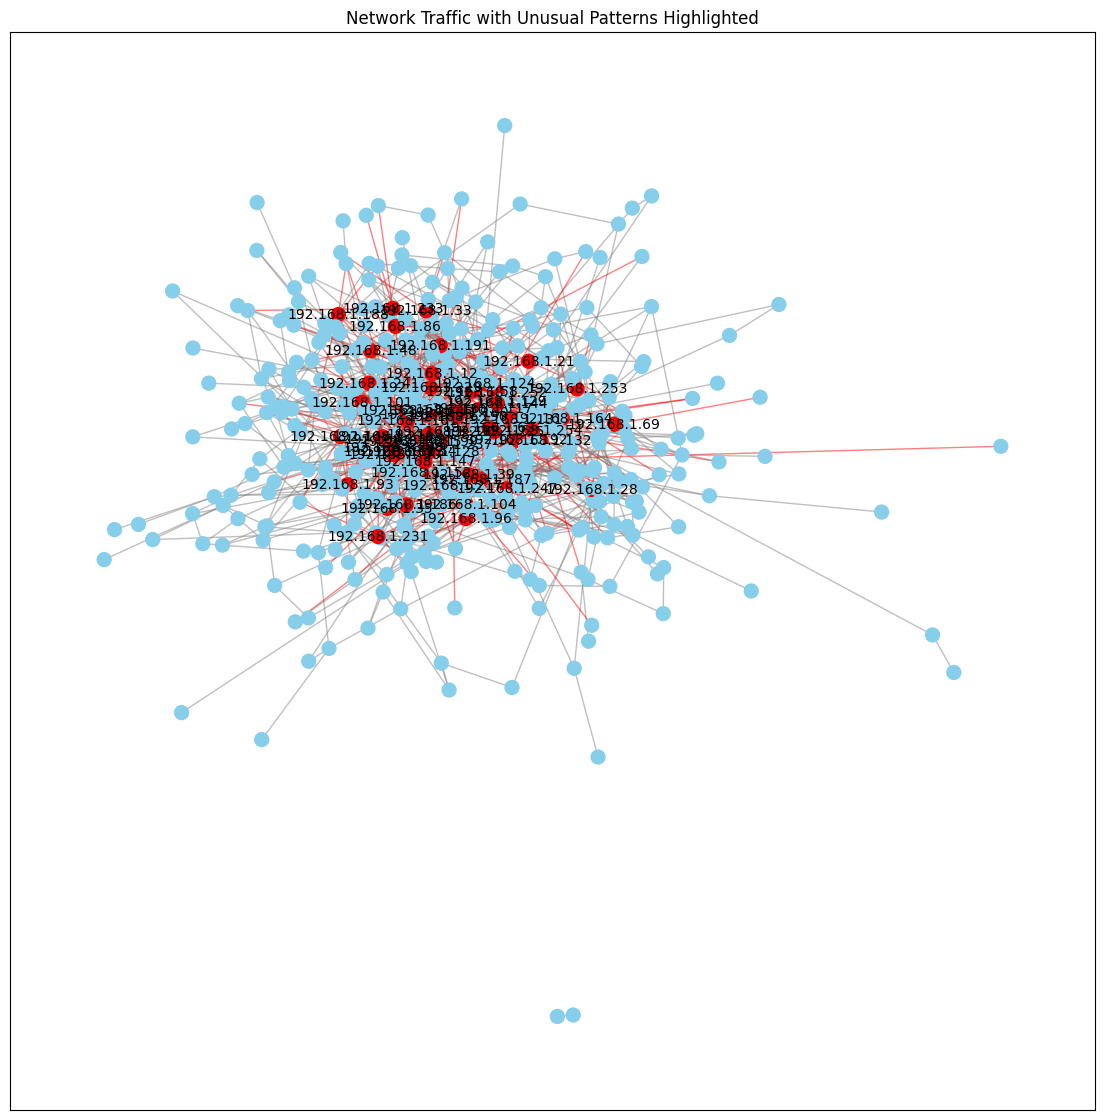

In [82]:
import networkx as nx
import matplotlib.pyplot as plt

# Create the network graph
G = nx.Graph()

# Iterate through the DataFrame and add edges (connections between src_ip and dst_ip)
for i, row in df_fake_network.iterrows():
    G.add_edge(row['src_ip'], row['dst_ip'], weight=row['rate'], label=row['anomaly'])

# Draw the network graph
plt.figure(figsize=(14, 14))

# Positioning the nodes using spring layout
pos = nx.spring_layout(G, k=0.15, iterations=20)

# Draw nodes, color based on whether they have suspicious traffic
node_colors = []
for node in G.nodes():
    # Check if node exists in the DataFrame
    if not df_fake_network[df_fake_network['src_ip'] == node].empty:
        anomaly_status = df_fake_network[df_fake_network['src_ip'] == node]['anomaly'].values[0]
        node_colors.append('red' if anomaly_status != 'Normal' else 'skyblue')
    else:
        # If node not found, default to 'skyblue' (Normal)
        node_colors.append('skyblue')

nx.draw_networkx_nodes(G, pos, node_size=100, node_color=node_colors)

# Draw edges, color based on whether they have suspicious traffic
edge_colors = []
for edge in G.edges():
    # Check if the edge exists in the DataFrame
    df_edge = df_fake_network[(df_fake_network['src_ip'] == edge[0]) & (df_fake_network['dst_ip'] == edge[1])]
    if not df_edge.empty:
        anomaly_status = df_edge['anomaly'].values[0]
        edge_colors.append('red' if anomaly_status != 'Normal' else 'gray')
    else:
        # If edge not found, default to 'gray' (Normal)
        edge_colors.append('gray')

nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color=edge_colors)

# Draw labels for suspicious nodes
suspicious_nodes = [node for node in G.nodes() if not df_fake_network[df_fake_network['src_ip'] == node].empty and df_fake_network[df_fake_network['src_ip'] == node]['anomaly'].values[0] != 'Normal']
nx.draw_networkx_labels(G, pos, labels={node: node for node in suspicious_nodes}, font_color='black', font_size=10)

# Display the network graph with anomalies marked
plt.title('Network Traffic with Unusual Patterns Highlighted')
plt.show()
